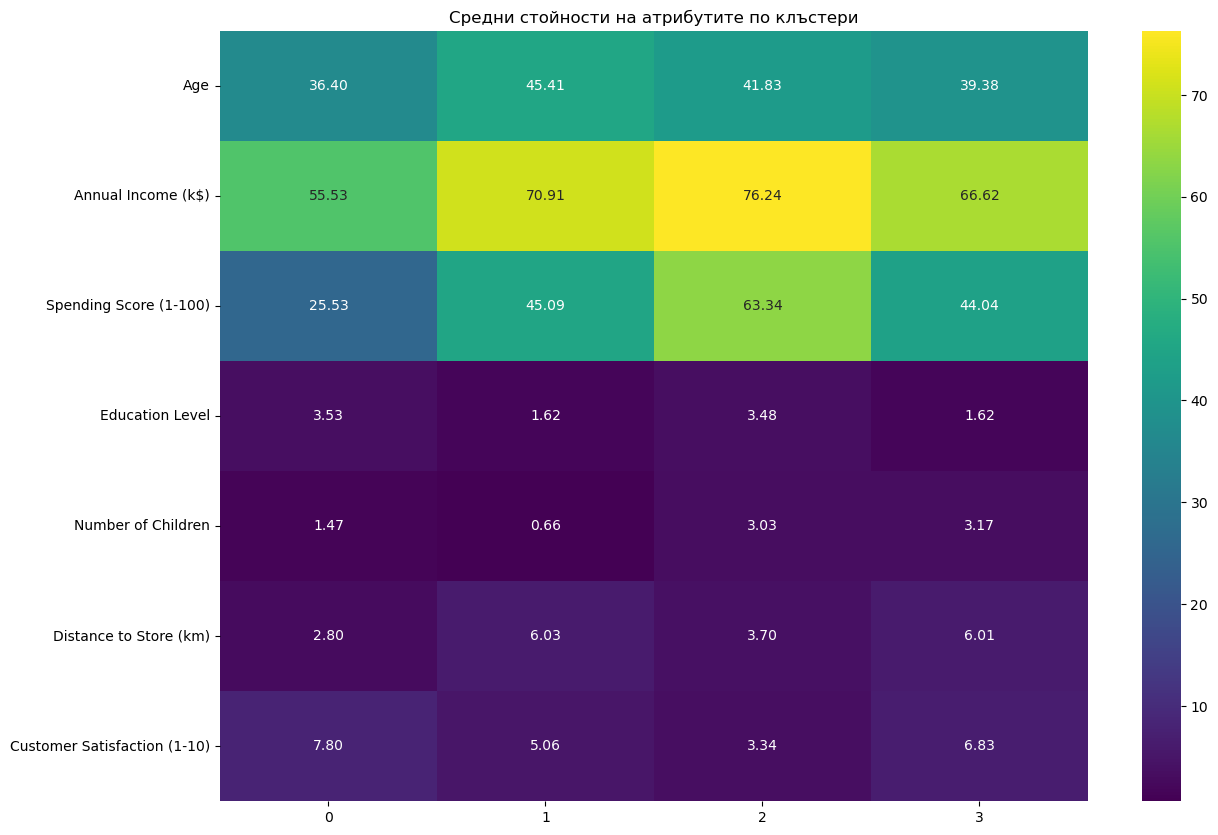

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Генериране на случайни данни с 100 екземпляра и 5-6 допълнителни характеристики
np.random.seed(0)
n_samples = 100
data = {
    'Age': np.random.randint(18, 70, size=n_samples),
    'Annual Income (k$)': np.random.randint(20, 120, size=n_samples),
    'Spending Score (1-100)': np.random.randint(1, 100, size=n_samples),
    'Education Level': np.random.randint(1, 5, size=n_samples),
    'Number of Children': np.random.randint(0, 5, size=n_samples),
    'Distance to Store (km)': np.random.uniform(0.1, 10.0, size=n_samples),
    'Customer Satisfaction (1-10)': np.random.randint(1, 11, size=n_samples)
}

# Създаване на DataFrame
df = pd.DataFrame(data)

# Нормализиране на данните
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(df)

# Определяне на броя на клъстерите (тук използваме 4)
kmeans = KMeans(n_clusters=4, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Изчисляване на средните стойности на атрибутите за всеки клъстер
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=df.columns[:-1])

# Визуализация с heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(cluster_centers_df.T, annot=True, cmap='viridis', fmt='.2f', cbar=True)
plt.title('Средни стойности на атрибутите по клъстери')
plt.show()


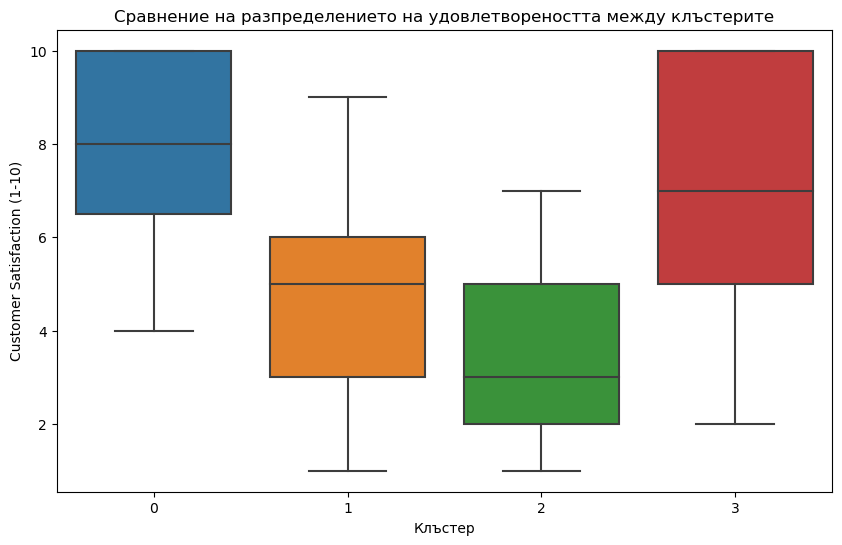

In [13]:
# Пример: сравнение на разпределението на дохода между различните клъстери
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Customer Satisfaction (1-10)', data=df)
plt.title('Сравнение на разпределението на удовлетвореността между клъстерите')
plt.xlabel('Клъстер')
plt.ylabel('Customer Satisfaction (1-10)')
plt.show()


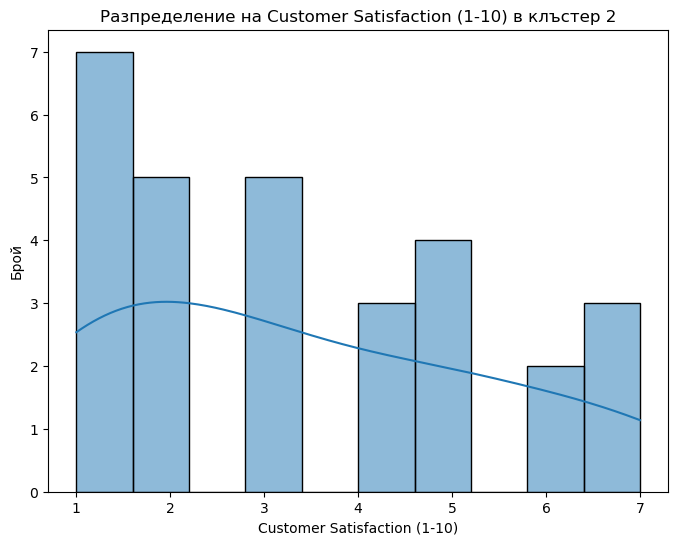

In [14]:
# Пример: визуализация на разпределението на възрастта в клъстер с индекс 0
plt.figure(figsize=(8, 6))
sns.histplot(cluster_2_data['Customer Satisfaction (1-10)'], bins=10, kde=True)
plt.title('Разпределение на Customer Satisfaction (1-10) в клъстер 2')
plt.xlabel('Customer Satisfaction (1-10)')
plt.ylabel('Брой')
plt.show()


WCSS: 45.452962918357834
Silhouette Coefficient: 0.15676667965231872
Davies-Bouldin Index: 1.808175417265905
Calinski-Harabasz Index: 17.60914540242513
1    32
2    29
3    24
0    15
Name: Cluster, dtype: int64
Inter-cluster distances (matrix):
[[       nan 0.86310087 0.78393036 0.87084058]
 [0.86310087        nan 0.93508163 0.66976114]
 [0.78393036 0.93508163        nan 0.80173012]
 [0.87084058 0.66976114 0.80173012        nan]]

Mean inter-cluster distance: 0.8207407825109708
Intra-cluster distance for cluster 0: 0.6065818383860578
Intra-cluster distance for cluster 1: 0.6703599163870722
Intra-cluster distance for cluster 2: 0.663232384827111
Intra-cluster distance for cluster 3: 0.657587260740336


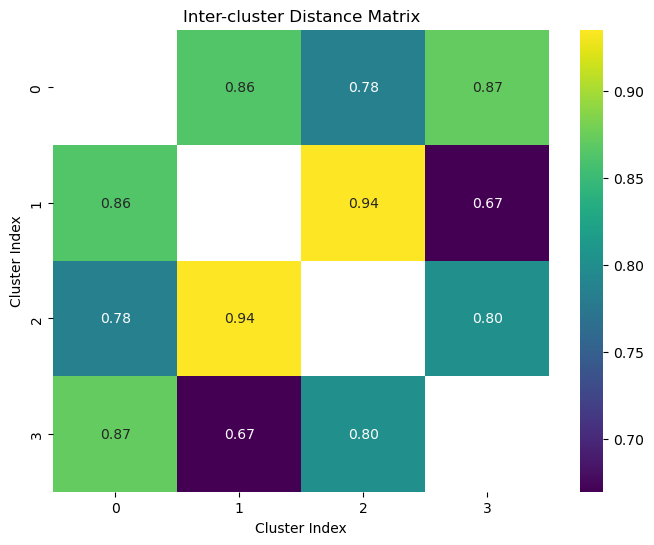

In [15]:
from scipy.spatial.distance import cdist

wcss = kmeans.inertia_
print(f'WCSS: {wcss}')
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, pairwise_distances_argmin_min

silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
print(f'Silhouette Coefficient: {silhouette_avg}')

davies_bouldin = davies_bouldin_score(scaled_features, df['Cluster'])
print(f'Davies-Bouldin Index: {davies_bouldin}')

calinski_harabasz = calinski_harabasz_score(scaled_features, df['Cluster'])
print(f'Calinski-Harabasz Index: {calinski_harabasz}')

# Пример: предполагаме, че имаме DataFrame df с колона 'Cluster'
cluster_counts = df['Cluster'].value_counts()
print(cluster_counts)

# Изчисляване на вътрешноклъстерното разстояние
def compute_intra_cluster_distances(X, labels, cluster_centers):
    intra_cluster_distances = []
    for i in range(len(cluster_centers)):
        cluster_points = X[labels == i]
        center = cluster_centers[i]
        distances = np.linalg.norm(cluster_points - center, axis=1)
        intra_cluster_distance = np.mean(distances)
        intra_cluster_distances.append(intra_cluster_distance)
    return intra_cluster_distances

cluster_centers = kmeans.cluster_centers_
intra_cluster_distances = compute_intra_cluster_distances(scaled_features, df['Cluster'].values, cluster_centers)

# Изчисляване на междуклъстерното разстояние
def compute_inter_cluster_distances(cluster_centers):
    distances = cdist(cluster_centers, cluster_centers, metric='euclidean')
    np.fill_diagonal(distances, np.nan)  # Ignore self-distances
    mean_inter_cluster_distance = np.nanmean(distances)
    return distances, mean_inter_cluster_distance

inter_cluster_distances, mean_inter_cluster_distance = compute_inter_cluster_distances(cluster_centers)

# Принтиране на междуклъстерните разстояния и средното междуклъстерно разстояние
print("Inter-cluster distances (matrix):")
print(inter_cluster_distances)
print(f"\nMean inter-cluster distance: {mean_inter_cluster_distance}")

# Принтиране на вътрешноклъстерното разстояние за всеки клъстер
for i, dist in enumerate(intra_cluster_distances):
    print(f'Intra-cluster distance for cluster {i}: {dist}')

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(inter_cluster_distances, annot=True, cmap='viridis', cbar=True, fmt='.2f')
plt.title('Inter-cluster Distance Matrix')
plt.xlabel('Cluster Index')
plt.ylabel('Cluster Index')
plt.show()
    

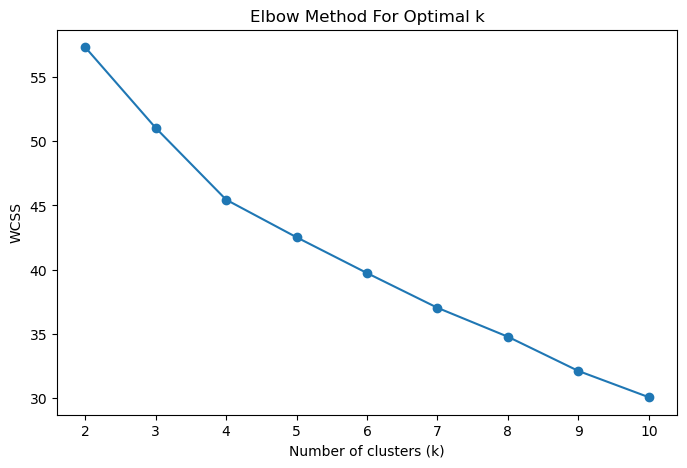

In [28]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
#from sklearn.datasets import make_blobs
# Генерираме синтетични данни за демонстрация
# X, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=0)

# Диапазон от стойности за k
k_values = range(2, 11)
wcss = []

# Изчисляване на WCSS за всяко k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    #kmeans.fit(df) 
    df['Cluster'] = kmeans.fit_predict(scaled_features)
    wcss.append(kmeans.inertia_)  # inertia_ съдържа WCSS

# Визуализиране на резултатите с "лакътя" (elbow plot)
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.xticks(k_values)
plt.show()
